In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
model_1_log = "../results/gpt2-124M-gqa/main.log"
model_2_log = "../results/gpt2-350M-gqa/main.log"

In [7]:
def get_loss(log_file):
    with open(log_file, 'r') as f:
        lines = f.readlines()
    train_loss = np.array([[int(line.split(' ')[1]), float(line.split(' ')[-1][:-1])] for line in lines if 'train' in line ])
    val_loss = np.array([[int(line.split(' ')[1]), float(line.split(' ')[-1][:-1])] for line in lines if 'val' in line ])
    return train_loss, val_loss

In [8]:
train_loss_1, val_loss_1 = get_loss(model_1_log)
train_loss_2, val_loss_2 = get_loss(model_2_log)

Text(0.5, 1.0, 'Custom gpt2 model: 124M vs 350M')

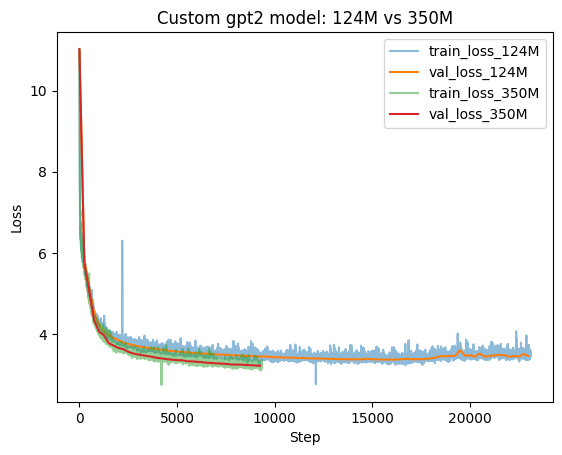

In [19]:
plt.plot(train_loss_1[:,0], train_loss_1[:,1], label='train_loss_124M', alpha=0.5)
plt.plot(val_loss_1[:,0], val_loss_1[:,1], label='val_loss_124M')
plt.plot(train_loss_2[:,0], train_loss_2[:,1], label='train_loss_350M', alpha=0.5)
plt.plot(val_loss_2[:,0], val_loss_2[:,1], label='val_loss_350M')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Custom gpt2 model: 124M vs 350M')

In [14]:
model_3_log = "../results/gpt2-124M-ori/main.log"

train_loss_3, val_loss_3 = get_loss(model_3_log)
train_loss_3 = train_loss_3[:len(train_loss_1)]
val_loss_3 = val_loss_3[:len(val_loss_1)]


Text(0.5, 1.0, 'Custom vs original gpt2 (124M)')

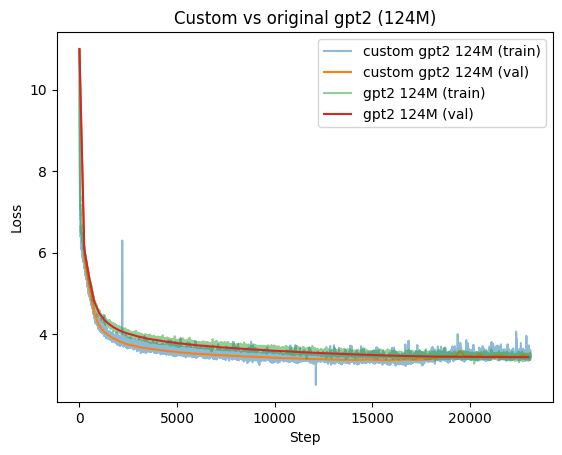

In [18]:
plt.plot(train_loss_1[:,0], train_loss_1[:,1], label='custom gpt2 124M (train)', alpha=0.5)
plt.plot(val_loss_1[:,0], val_loss_1[:,1], label='custom gpt2 124M (val)')
plt.plot(train_loss_3[:,0], train_loss_3[:,1], label='gpt2 124M (train)', alpha=0.5)
plt.plot(val_loss_3[:,0], val_loss_3[:,1], label='gpt2 124M (val)')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Custom vs original gpt2 (124M)')

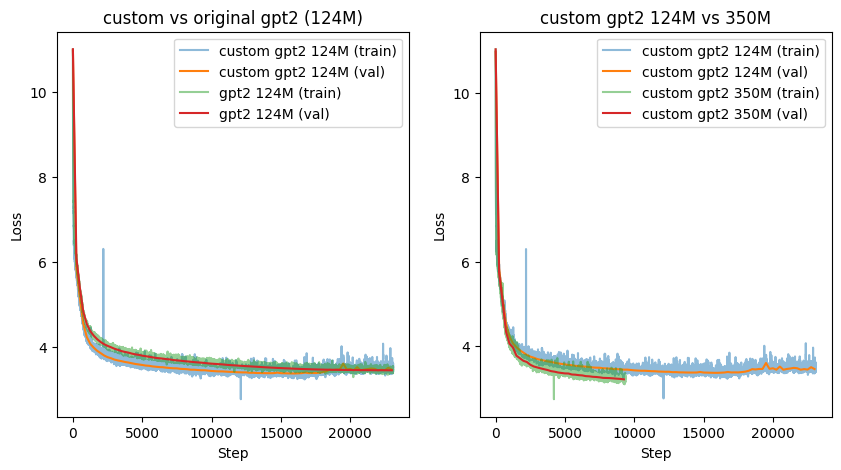

In [24]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(train_loss_1[:,0], train_loss_1[:,1], label='custom gpt2 124M (train)', alpha=0.5)
axs[0].plot(val_loss_1[:,0], val_loss_1[:,1], label='custom gpt2 124M (val)')
axs[0].plot(train_loss_3[:,0], train_loss_3[:,1], label='gpt2 124M (train)', alpha=0.5)
axs[0].plot(val_loss_3[:,0], val_loss_3[:,1], label='gpt2 124M (val)')
axs[0].legend()
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Loss')
axs[0].set_title('custom vs original gpt2 (124M)')

axs[1].plot(train_loss_1[:,0], train_loss_1[:,1], label='custom gpt2 124M (train)', alpha=0.5)
axs[1].plot(val_loss_1[:,0], val_loss_1[:,1], label='custom gpt2 124M (val)')
axs[1].plot(train_loss_2[:,0], train_loss_2[:,1], label='custom gpt2 350M (train)', alpha=0.5)
axs[1].plot(val_loss_2[:,0], val_loss_2[:,1], label='custom gpt2 350M (val)')

axs[1].legend()
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Loss')
axs[1].set_title('custom gpt2 124M vs 350M')
plt.show()